In [3]:
import jams
import os
import json
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
def dir_to_score(ref_dir, est_dir):
    # ref_dir and est_dir need to contain all 8 jams files of the test-set
    jams_list = [f for f in os.listdir(est_dir) if f.split('.')[1] == 'jams']
    ref_list = [f for f in os.listdir(ref_dir) if f.split('.')[1] == 'jams']
    jams_list.sort()
    ref_list.sort()
    
    # combine and collect all annotations in big_est and big_ref
    big_est = jams.Annotation('pitch_midi')
    big_ref = jams.Annotation('pitch_midi')
    big_est.duration = 0
    big_ref.duration = 0
    for e,r in zip(jams_list, ref_list):
        est_jams = jams.load(os.path.join(est_dir, e))
        ref_jams = jams.load(os.path.join(ref_dir, r))
        # print(e,r)
        for i in range(6):
            est_ann = est_jams.search(namespace='pitch_midi')[i]
            ref_ann = ref_jams.search(namespace='pitch_midi')[i]
            t_offset = i * est_ann.duration + big_est.duration
            big_est.duration += est_ann.duration
            big_ref.duration += ref_ann.duration
            for obs in est_ann:
                big_est.append(time=obs.time + t_offset, duration=obs.duration, value=obs.value)
            for obs in ref_ann:
                big_ref.append(time=obs.time + t_offset, duration=obs.duration, value=obs.value)
                
    scores = jams.eval.transcription(big_ref, big_est)
    return scores


def get_dir_list(dir_path):
    dir_list = [os.path.join(dir_path, d) for d in os.listdir(dir_path) 
                if os.path.isdir(os.path.join(dir_path, d))]
    return dir_list


In [5]:
est_base_dir = '/Users/tom/Music/DataSet/test-set_mira_search1/'
ref_dir = '/Users/tom/Music/DataSet/test-set_man'
est_dir_list = get_dir_list(est_base_dir)

output = []
len_todo = len(est_dir_list)
for est_dir in est_dir_list:
    print(est_dir, len_todo)
    s = dir_to_score(ref_dir, est_dir)
    param_path = os.path.join(est_dir, 'param.json')
    if os.path.isfile(param_path):
        with open(param_path, 'r') as stream:
            param = json.load(stream)
        output.append([s, param])
    else:
        print('no param.json')
    len_todo -= 1

('/Users/tom/Music/DataSet/test-set_mira_search1/2GPH', 41)


('/Users/tom/Music/DataSet/test-set_mira_search1/6ZWQ', 40)


('/Users/tom/Music/DataSet/test-set_mira_search1/WF6A', 39)


('/Users/tom/Music/DataSet/test-set_mira_search1/BBDD', 38)


('/Users/tom/Music/DataSet/test-set_mira_search1/51CB', 37)


('/Users/tom/Music/DataSet/test-set_mira_search1/DL88', 36)


('/Users/tom/Music/DataSet/test-set_mira_search1/FBDY', 35)


('/Users/tom/Music/DataSet/test-set_mira_search1/PKBA', 34)


('/Users/tom/Music/DataSet/test-set_mira_search1/SM7N', 33)


('/Users/tom/Music/DataSet/test-set_mira_search1/ZVMH', 32)


('/Users/tom/Music/DataSet/test-set_mira_search1/CUIA', 31)


('/Users/tom/Music/DataSet/test-set_mira_search1/DVTO', 30)


('/Users/tom/Music/DataSet/test-set_mira_search1/RWQ0', 29)


('/Users/tom/Music/DataSet/test-set_mira_search1/HCZ5', 28)


('/Users/tom/Music/DataSet/test-set_mira_search1/D7GQ', 27)


('/Users/tom/Music/DataSet/test-set_mira_search1/VIID', 26)


no param.json
('/Users/tom/Music/DataSet/test-set_mira_search1/TT2C', 25)


('/Users/tom/Music/DataSet/test-set_mira_search1/BLP8', 24)


('/Users/tom/Music/DataSet/test-set_mira_search1/XZ6S', 23)


('/Users/tom/Music/DataSet/test-set_mira_search1/Y348', 22)


('/Users/tom/Music/DataSet/test-set_mira_search1/BKBA', 21)


('/Users/tom/Music/DataSet/test-set_mira_search1/YTKW', 20)


('/Users/tom/Music/DataSet/test-set_mira_search1/2VVC', 19)


('/Users/tom/Music/DataSet/test-set_mira_search1/F2ZW', 18)


('/Users/tom/Music/DataSet/test-set_mira_search1/16P3', 17)


('/Users/tom/Music/DataSet/test-set_mira_search1/CICB', 16)


('/Users/tom/Music/DataSet/test-set_mira_search1/V3TY', 15)


('/Users/tom/Music/DataSet/test-set_mira_search1/HQAI', 14)


('/Users/tom/Music/DataSet/test-set_mira_search1/2COL', 13)


('/Users/tom/Music/DataSet/test-set_mira_search1/1W02', 12)


('/Users/tom/Music/DataSet/test-set_mira_search1/T3EI', 11)


('/Users/tom/Music/DataSet/test-set_mira_search1/LPPK', 10)


('/Users/tom/Music/DataSet/test-set_mira_search1/L406', 9)


('/Users/tom/Music/DataSet/test-set_mira_search1/A43J', 8)


('/Users/tom/Music/DataSet/test-set_mira_search1/SYSG', 7)


('/Users/tom/Music/DataSet/test-set_mira_search1/JCU7', 6)


('/Users/tom/Music/DataSet/test-set_mira_search1/O3UF', 5)


('/Users/tom/Music/DataSet/test-set_mira_search1/81Y0', 4)


('/Users/tom/Music/DataSet/test-set_mira_search1/Y29R', 3)


('/Users/tom/Music/DataSet/test-set_mira_search1/1C9N', 2)


('/Users/tom/Music/DataSet/test-set_mira_search1/DTD5', 1)


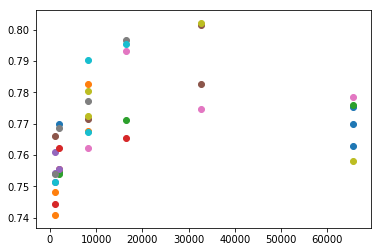

In [6]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['nfft'], scores['F-measure_no_offset'])
plt.show()

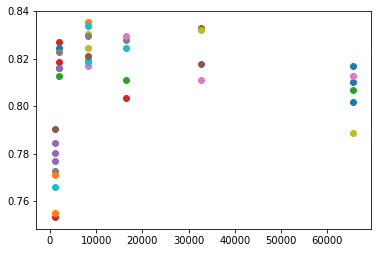

In [8]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['nfft'], scores['Recall_no_offset'])
plt.show()


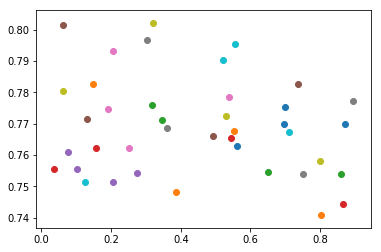

In [9]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['minimal_interference'], scores['F-measure_no_offset'])
plt.show()


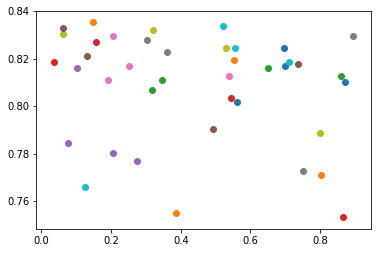

In [10]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['minimal_interference'], scores['Recall_no_offset'])
plt.show()


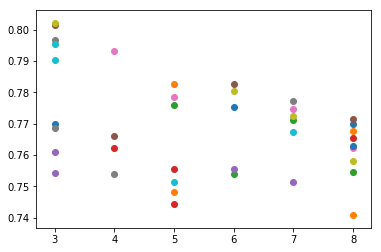

In [11]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['n_iter'], scores['F-measure_no_offset'])
plt.show()

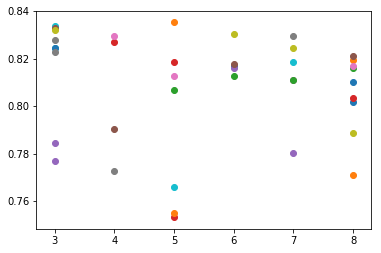

In [12]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['n_iter'], scores['Recall_no_offset'])
plt.show()

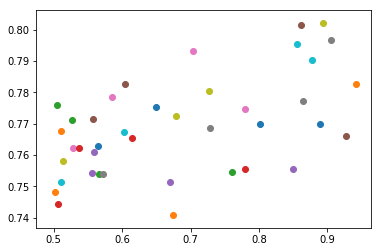

In [13]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['overlap'], scores['F-measure_no_offset'])
plt.show()

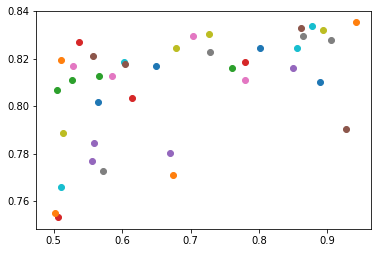

In [15]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['overlap'], scores['Recall_no_offset'])
plt.show()